In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from warnings import simplefilter
simplefilter(action='ignore')

<b>Importing DataSet

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.shape

(150, 5)

In [7]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

<b>Encoding categorical data values (Transforming categorical data/ Strings to integers)</b>

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

<b>Check correlation using HeatMap</b>

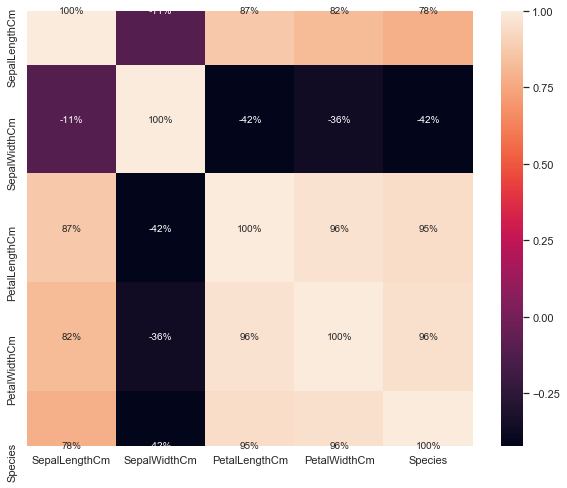

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

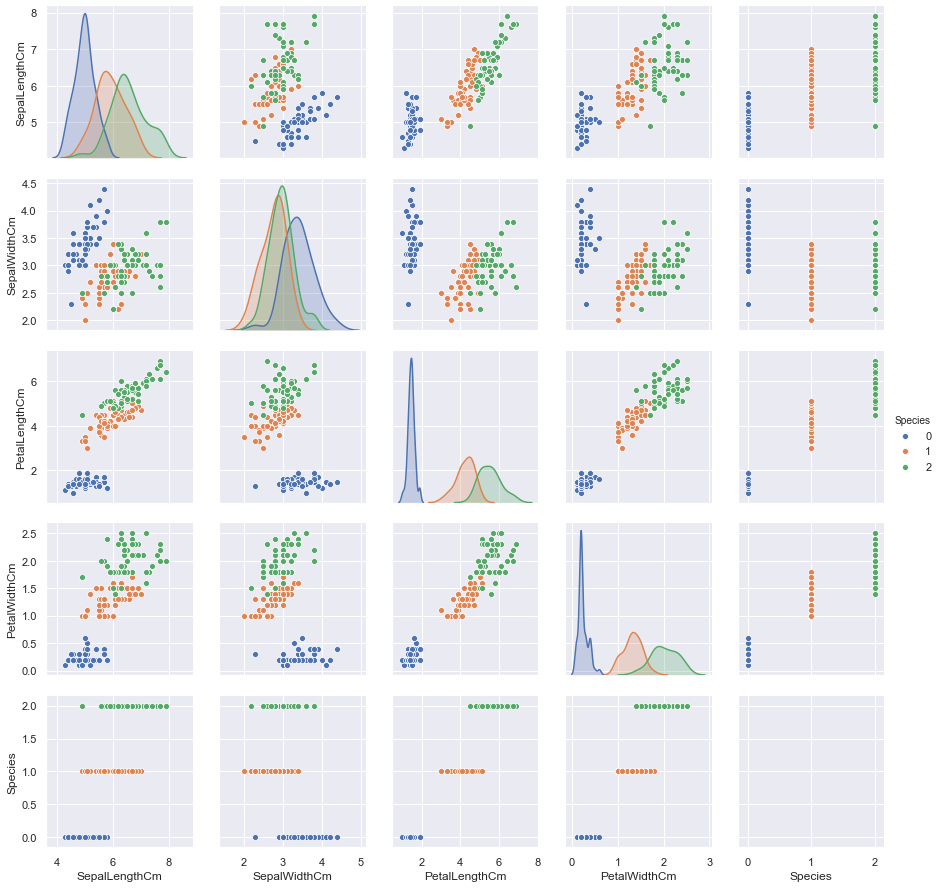

In [10]:
sns.pairplot(df, hue='Species', size=2.5);

<b>Split the data into independent 'X' and dependent 'Y' variables

In [11]:
X = df.iloc[:,0:4].values
Y = df.iloc[:,-1:].values

<b>Split the dataset into 75% Training set and 25% Testing set</b>

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.25)

<b>Feature scalling</b>

In [13]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()
X_train = scaller.fit_transform(X_train)
X_test = scaller.transform(X_test)

<h2><span style="background-color:yellow;">Classification</span></h2>

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def models(X_train,Y_tarin):
    #Using Logistic Regression Algorithm to the Training Set
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression()
    log.fit(X_train,Y_train)
    parameters = [{'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]
    logGS = GridSearchCV(estimator = log, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)
    logGS.fit(X_train, Y_train)
    
    #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn.fit(X_train, Y_train)
    parameters = [{'n_neighbors':[1,2,3,4,5,6,7,8]}]
    knnGS = GridSearchCV(estimator = knn, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)
    knnGS.fit(X_train, Y_train)
    
    #Using SVC method of svm class to use Support Vector Machine Algorithm
    from sklearn.svm import SVC
    svc = SVC()
    svc.fit(X_train, Y_train)
    parameters = [{'kernel':['linear', 'poly', 'rbf', 'sigmoid']}]
    svcGS = GridSearchCV(estimator = svc, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)
    svcGS.fit(X_train, Y_train)
    
    #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier()
    tree.fit(X_train, Y_train)
    parameters = [{'criterion':['entropy', 'gini']}]
    treeGS = GridSearchCV(estimator = tree, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)
    treeGS.fit(X_train, Y_train)
    
    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = DecisionTreeClassifier()
    forest.fit(X_train, Y_train)
    parameters = [{'criterion':['entropy', 'gini']}]
    forestGS = GridSearchCV(estimator = forest, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)
    forestGS.fit(X_train, Y_train)
    
    model_name = ['Logistic Regression','KNeighbors','SVM', 'GaussianNB', 'Decision Tree', 'Random Forest']
    
    return logGS, knnGS, svcGS, gauss, treeGS, forestGS, model_name

In [15]:
model = models(X_train, Y_train)

C:\Users\Dinesh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Dinesh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Dinesh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
for i in range(len(model)-1):
    print('Model : ',model[6][i])
    #Check precision, recall, f1-score
    print(classification_report(Y_test, model[i].predict(X_test)))
    print('------------------')
    print( accuracy_score(Y_test, model[i].predict(X_test)))
    print('-----------------------------------------------------')

Model :  Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.81      0.87        16
           2       0.73      0.89      0.80         9

    accuracy                           0.89        38
   macro avg       0.89      0.90      0.89        38
weighted avg       0.91      0.89      0.90        38

------------------
0.8947368421052632
-----------------------------------------------------
Model :  KNeighbors
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

------------------
0.9736842105263158
-----------------------------------------------------
Model

GaussianNB is the best model

<b>Saving GaussianNB model

In [19]:
from sklearn.externals import joblib
joblib.dump(model[3], 'GaussianNB_model.pkl')

['GaussianNB_model.pkl']